Updated Weight and Bias Values:
Weights: [[1.31814278]]
Bias: [-1.37362595]


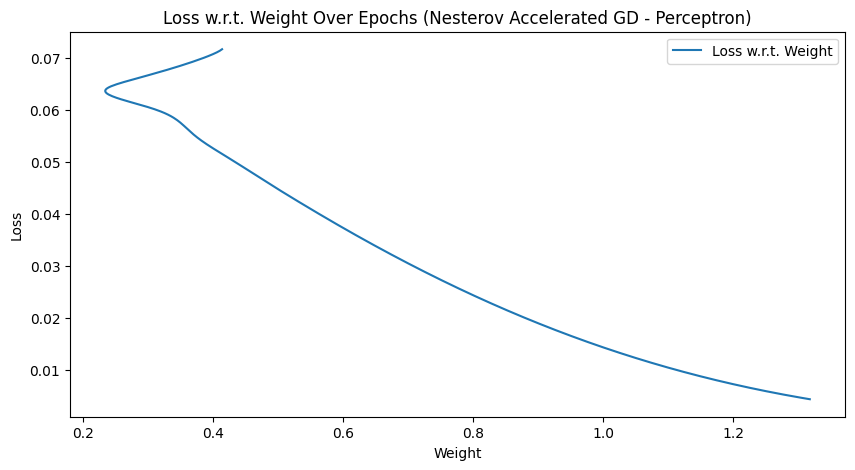

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return 1 if x > 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_loss(X, Y, weights, bias):
    predictions = sigmoid(np.dot(X, weights) + bias)
    loss = 0.5 * np.mean((Y - predictions)**2)
    return predictions, loss

def update_weights_nesterov(X, Y, learning_rate, momentum, weights, bias, v_weights):
    predictions, _ = compute_loss(X, Y, weights - momentum * v_weights, bias)
    error = Y - predictions

    # Update weights using Nesterov Accelerated Gradient Descent
    v_weights = momentum * v_weights + learning_rate * np.dot(X.T, error)
    weights += v_weights

    # Update bias
    bias += learning_rate * np.sum(error)

    return weights, bias, v_weights

# Step a: Define initial data
X = np.array([[0.5], [2.5]])
Y = np.array([[0.2], [0.9]])

# Step b: Initialize a perceptron with random weights
input_size = 1
output_size = 1

weights = np.random.rand(input_size, output_size)
bias = np.random.rand(output_size)

# Nesterov Accelerated Gradient Descent parameters
learning_rate = 0.01
momentum = 0.9
v_weights = np.zeros_like(weights)

# Step c: Nesterov Accelerated Gradient Descent Optimization
num_epochs = 1000

loss_history = []
weight_history = []

for epoch in range(num_epochs):
    # Calculate squared error loss and update weights using Nesterov Accelerated Gradient Descent
    predictions, loss = compute_loss(X, Y, weights, bias)
    weights, bias, v_weights = update_weights_nesterov(X, Y, learning_rate, momentum, weights, bias, v_weights)

    loss_history.append(loss)
    weight_history.append(weights[0, 0])  # Assuming a single weight for simplicity

# Step iii: Display updated weight and bias values
print("Updated Weight and Bias Values:")
print("Weights:", weights)
print("Bias:", bias)

# Step iv: Plot loss w.r.t. weight values
plt.figure(figsize=(10, 5))
plt.plot(weight_history, loss_history, label='Loss w.r.t. Weight')
plt.title('Loss w.r.t. Weight Over Epochs (Nesterov Accelerated GD - Perceptron)')
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.legend()
plt.show()
